In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from statsmodels import tsa
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


from catch22 import catch22_all

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

import time

#Prophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot


import seaborn as sns
import re
from keras import *
from keras.callbacks import *
import os
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [496]:
data = pd.read_csv('./all_BTC_Data.csv',sep=',')
data

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,1.815430e+02,2.775561e+09,154298.000,1.193000e+03,0.000010,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2010/07/18,0.0726,248,765.285,424,1.815430e+02,1.554461e+09,401834.000,2.612000e+03,0.000243,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2010/07/19,0.0859,354,756.040,553,1.815430e+02,1.551287e+09,481473.000,4.047000e+03,0.000022,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,2010/07/20,0.0783,413,984.707,632,1.815430e+02,1.640430e+09,431831.000,2.341000e+03,0.000000,...,82.751,0.000,0.000,0.000,0.000,58.099,0.000,0.000,0.000,0.000
4,2010/07/21,0.0767,256,542.483,440,1.815430e+02,1.723493e+09,460783.000,2.122000e+03,0.000000,...,78.603,0.000,0.000,0.000,0.000,5.652,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,2021/06/01,36599.0000,234419,876479.000,433113,2.104773e+13,1.517761e+20,0.225,1.583247e+10,7.381000,...,54.486,36.018,31.752,36.063,46.970,3.782,-3.899,-17.182,-35.633,-27.392
3973,2021/06/02,37295.0000,250423,822467.000,443730,2.104773e+13,1.620926e+20,0.250,1.523192e+10,7.615000,...,68.829,41.987,34.436,37.183,47.320,5.116,-4.983,-4.729,-35.601,-24.531
3974,2021/06/03,38539.0000,255474,840977.000,448548,2.104773e+13,1.603912e+20,0.233,1.630202e+10,7.525000,...,83.111,51.443,39.054,39.155,47.943,6.597,-0.701,-3.231,-30.318,-19.220
3975,2021/06/04,37117.0000,236541,816280.000,363012,2.104773e+13,1.427373e+20,0.224,1.414596e+10,6.644000,...,46.553,42.261,35.939,37.754,47.297,1.416,1.347,-5.160,-33.567,-23.613


Text(0, 0.5, 'Price')

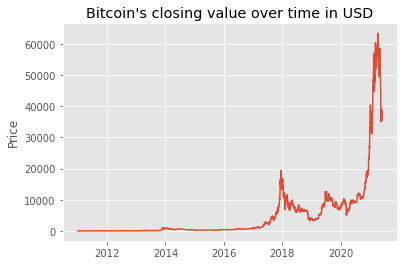

In [492]:
#data[data.Date>'2016-06-01'][['Date','priceUSD']].plot()
plt.plot(pd.to_datetime(data[data.Date>'2011-06-01']['Date']),data[data.Date>'2011-06-01']['priceUSD'])
plt.title("Bitcoin's closing value over time in USD");
plt.ylabel('Price')

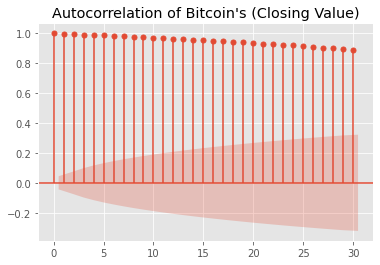

In [464]:
plot_acf(data[data.Date>'2016-06-01']['priceUSD'], lags=30)
plt.title("Autocorrelation of Bitcoin's (Closing Value)");

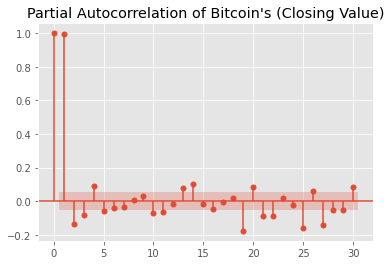

In [494]:
plot_pacf(data[data.Date>'2018-01-01']['priceUSD'], lags=30);
plt.title("Partial Autocorrelation of Bitcoin's (Closing Value)");

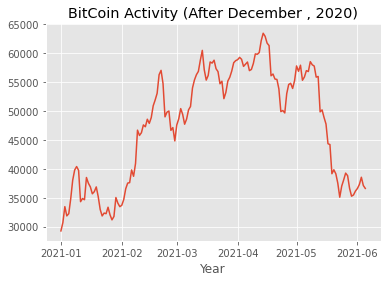

In [468]:
plt.plot(pd.to_datetime(data[data.Date>'2021-01-01']['Date']),data[data.Date>'2021-01-01']['priceUSD'])
plt.title('BitCoin Activity (After December , 2020)')
plt.xlabel('Year');

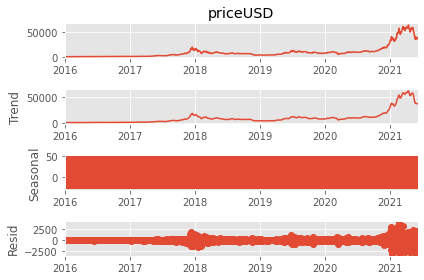

In [470]:
data.index = pd.to_datetime(data.Date)
result = seasonal_decompose(data[data.Date>'2016-06-01']['priceUSD'])
result.plot();

That looks not that promissing, likely due to the amount of time when bitcoin was worth much less than nowadays.

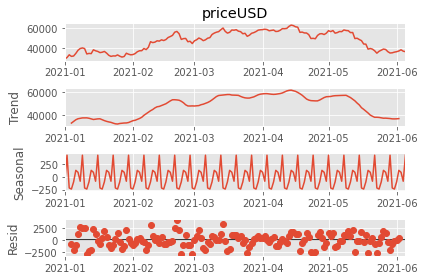

In [477]:
result = seasonal_decompose(data[data.Date>'2021-01-01']['priceUSD'])
result.plot();

This shows:
- a clearer trend when focusing on last year, where price increased a lot
- Bitcoin does not seem to be heavily affected by seasonality, only +/- 250
- Residuals seem to make up the majority of variability, which makes sense consider how  bitcoins have stronger social driving factors rather than seasonal/global

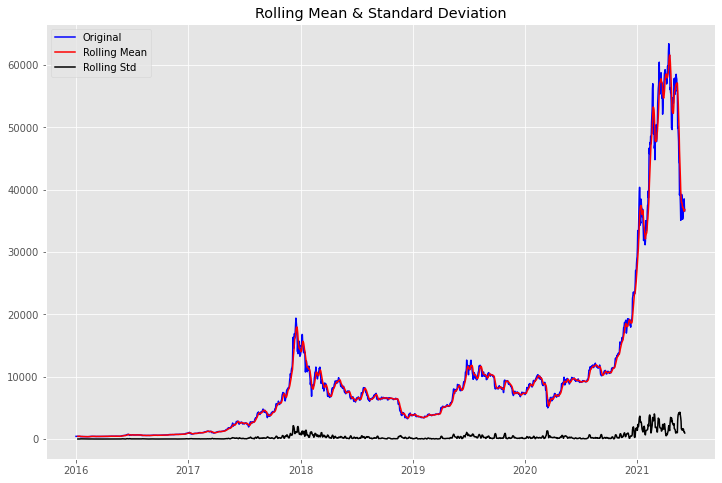

In [481]:
rolmean = data[data.Date>'2016-06-01']['priceUSD'].rolling(window=7, center=False).mean()
rolstd = data[data.Date>'2016-06-01']['priceUSD'].rolling(window=7, center=False).std()

# Plotting rolling statistics:
fig = plt.figure(figsize=(12, 8))
orig = plt.plot(data[data.Date>'2016-06-01']['priceUSD'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [490]:
# Performing a Dickey-Fuller test:

df_daily = data[data.Date>'2016-06-01']['priceUSD']

# Resampling to weekly frequency
df_week = data[data.Date>'2016-06-01']['priceUSD'].resample('W').mean()

print("Dickey–Fuller test for Daily: p={}".format(round(tsa.stattools.adfuller(df_daily)[1],5)))
print("Dickey–Fuller test for Weekly: p={}".format(round(tsa.stattools.adfuller(df_week)[1],5)))


Dickey–Fuller test for Daily: p=0.60468
Dickey–Fuller test for Weekly: p=0.05829


In [878]:
interval1 = (data['Date'] >= '2016/06/05') & (data['Date'] <= '2021/06/05')
interval2=(data['Date'] >= '2018/06/05') & (data['Date'] <= '2021/06/05')
interval3=(data['Date'] >= '2020/06/05') & (data['Date'] <= '2021/06/05')

In [879]:
dataset=data.loc[interval1]
dataset

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
2150,2016/06/05,573.875,189632,611143.0,262657,1.993121e+11,1.423231e+18,1.731,8.108257e+08,0.134,...,97.735,95.106,90.456,82.428,66.762,7.348,9.861,30.051,27.114,40.043
2151,2016/06/06,580.536,221001,705374.0,309392,1.993121e+11,1.676431e+18,1.490,9.075389e+08,0.137,...,98.316,95.626,91.066,83.115,67.244,5.174,8.891,31.441,26.758,40.679
2152,2016/06/07,579.599,230876,803520.0,318170,1.993121e+11,1.474140e+18,1.397,9.881933e+08,0.132,...,93.268,93.986,90.193,82.644,67.105,1.478,8.252,30.221,26.662,40.699
2153,2016/06/08,574.524,229789,802157.0,309831,1.964226e+11,1.434838e+18,1.462,9.514434e+08,0.126,...,65.815,84.798,85.415,80.105,66.357,0.113,7.953,28.214,25.414,38.840
2154,2016/06/09,574.280,236188,720538.0,329488,1.960614e+11,1.536030e+18,1.562,9.870391e+08,0.129,...,64.447,84.336,85.181,79.983,66.321,-1.078,7.424,27.379,26.285,36.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,2021/06/01,36599.000,234419,876479.0,433113,2.104773e+13,1.517761e+20,0.225,1.583247e+10,7.381,...,54.486,36.018,31.752,36.063,46.970,3.782,-3.899,-17.182,-35.633,-27.392
3973,2021/06/02,37295.000,250423,822467.0,443730,2.104773e+13,1.620926e+20,0.250,1.523192e+10,7.615,...,68.829,41.987,34.436,37.183,47.320,5.116,-4.983,-4.729,-35.601,-24.531
3974,2021/06/03,38539.000,255474,840977.0,448548,2.104773e+13,1.603912e+20,0.233,1.630202e+10,7.525,...,83.111,51.443,39.054,39.155,47.943,6.597,-0.701,-3.231,-30.318,-19.220
3975,2021/06/04,37117.000,236541,816280.0,363012,2.104773e+13,1.427373e+20,0.224,1.414596e+10,6.644,...,46.553,42.261,35.939,37.754,47.297,1.416,1.347,-5.160,-33.567,-23.613


In [880]:
one=dataset['priceUSD'].shift(-1)
seven=dataset['priceUSD'].shift(-7)
thirty=dataset['priceUSD'].shift(-30)
ninety=dataset['priceUSD'].shift(-90)

In [881]:
dataset['PriceShifted']=one
dataset

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,PriceShifted
2150,2016/06/05,573.875,189632,611143.0,262657,1.993121e+11,1.423231e+18,1.731,8.108257e+08,0.134,...,95.106,90.456,82.428,66.762,7.348,9.861,30.051,27.114,40.043,580.536
2151,2016/06/06,580.536,221001,705374.0,309392,1.993121e+11,1.676431e+18,1.490,9.075389e+08,0.137,...,95.626,91.066,83.115,67.244,5.174,8.891,31.441,26.758,40.679,579.599
2152,2016/06/07,579.599,230876,803520.0,318170,1.993121e+11,1.474140e+18,1.397,9.881933e+08,0.132,...,93.986,90.193,82.644,67.105,1.478,8.252,30.221,26.662,40.699,574.524
2153,2016/06/08,574.524,229789,802157.0,309831,1.964226e+11,1.434838e+18,1.462,9.514434e+08,0.126,...,84.798,85.415,80.105,66.357,0.113,7.953,28.214,25.414,38.840,574.280
2154,2016/06/09,574.280,236188,720538.0,329488,1.960614e+11,1.536030e+18,1.562,9.870391e+08,0.129,...,84.336,85.181,79.983,66.321,-1.078,7.424,27.379,26.285,36.871,573.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,2021/06/01,36599.000,234419,876479.0,433113,2.104773e+13,1.517761e+20,0.225,1.583247e+10,7.381,...,36.018,31.752,36.063,46.970,3.782,-3.899,-17.182,-35.633,-27.392,37295.000
3973,2021/06/02,37295.000,250423,822467.0,443730,2.104773e+13,1.620926e+20,0.250,1.523192e+10,7.615,...,41.987,34.436,37.183,47.320,5.116,-4.983,-4.729,-35.601,-24.531,38539.000
3974,2021/06/03,38539.000,255474,840977.0,448548,2.104773e+13,1.603912e+20,0.233,1.630202e+10,7.525,...,51.443,39.054,39.155,47.943,6.597,-0.701,-3.231,-30.318,-19.220,37117.000
3975,2021/06/04,37117.000,236541,816280.0,363012,2.104773e+13,1.427373e+20,0.224,1.414596e+10,6.644,...,42.261,35.939,37.754,47.297,1.416,1.347,-5.160,-33.567,-23.613,36607.000


In [882]:
dataset.dropna(subset=['PriceShifted'],inplace=True)
dataset.reset_index(drop=True,inplace=True)
dataset

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,PriceShifted
0,2016/06/05,573.875,189632,611143.0,262657,1.993121e+11,1.423231e+18,1.731,8.108257e+08,0.134,...,95.106,90.456,82.428,66.762,7.348,9.861,30.051,27.114,40.043,580.536
1,2016/06/06,580.536,221001,705374.0,309392,1.993121e+11,1.676431e+18,1.490,9.075389e+08,0.137,...,95.626,91.066,83.115,67.244,5.174,8.891,31.441,26.758,40.679,579.599
2,2016/06/07,579.599,230876,803520.0,318170,1.993121e+11,1.474140e+18,1.397,9.881933e+08,0.132,...,93.986,90.193,82.644,67.105,1.478,8.252,30.221,26.662,40.699,574.524
3,2016/06/08,574.524,229789,802157.0,309831,1.964226e+11,1.434838e+18,1.462,9.514434e+08,0.126,...,84.798,85.415,80.105,66.357,0.113,7.953,28.214,25.414,38.840,574.280
4,2016/06/09,574.280,236188,720538.0,329488,1.960614e+11,1.536030e+18,1.562,9.870391e+08,0.129,...,84.336,85.181,79.983,66.321,-1.078,7.424,27.379,26.285,36.871,573.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021/05/31,36154.000,226328,851276.0,424734,2.104773e+13,1.436839e+20,0.233,1.832795e+10,7.266,...,32.195,30.052,35.351,46.746,-1.283,-2.316,-18.455,-37.435,-25.656,36599.000
1822,2021/06/01,36599.000,234419,876479.0,433113,2.104773e+13,1.517761e+20,0.225,1.583247e+10,7.381,...,36.018,31.752,36.063,46.970,3.782,-3.899,-17.182,-35.633,-27.392,37295.000
1823,2021/06/02,37295.000,250423,822467.0,443730,2.104773e+13,1.620926e+20,0.250,1.523192e+10,7.615,...,41.987,34.436,37.183,47.320,5.116,-4.983,-4.729,-35.601,-24.531,38539.000
1824,2021/06/03,38539.000,255474,840977.0,448548,2.104773e+13,1.603912e+20,0.233,1.630202e+10,7.525,...,51.443,39.054,39.155,47.943,6.597,-0.701,-3.231,-30.318,-19.220,37117.000


In [885]:
# We want 80% of the data to be used for training, and 20% for testing
n_train_rows = int(dataset.shape[0]*.9)-1

# Split into train and test sets but keep all  columns
train = dataset.iloc[:n_train_rows, :]
test = dataset.iloc[n_train_rows:, :]

# The total rows of the two datasets should equal the total amount of rows in your CSV
print(train.shape)
print(test.shape)

(1642, 738)
(184, 738)


In [886]:
test

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,PriceShifted
1642,2020/12/03,19280.0,346764,886299.0,590303,1.915715e+13,1.428019e+20,0.152,9.270888e+09,8.106,...,67.186,68.236,70.387,67.510,2.001,10.756,8.079,41.655,85.509,19133.0
1643,2020/12/04,19133.0,318750,881962.0,556075,1.915715e+13,1.416959e+20,0.136,1.137218e+10,6.529,...,63.879,66.448,69.305,66.999,-0.739,12.582,4.421,37.672,86.136,19000.0
1644,2020/12/05,19000.0,282455,884096.0,481834,1.915715e+13,1.427656e+20,0.129,6.152730e+09,4.685,...,60.711,64.786,68.318,66.537,0.258,9.720,1.570,29.197,86.186,19151.0
1645,2020/12/06,19151.0,258488,852724.0,426830,1.915715e+13,1.253224e+20,0.137,5.949622e+09,3.586,...,63.129,65.829,68.839,66.799,-0.671,6.430,3.919,22.936,88.427,19207.0
1646,2020/12/07,19207.0,300756,789558.0,513146,1.915715e+13,1.463397e+20,0.132,8.955966e+09,4.372,...,64.081,66.227,69.033,66.896,0.386,1.613,4.146,25.094,89.118,18955.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021/05/31,36154.0,226328,851276.0,424734,2.104773e+13,1.436839e+20,0.233,1.832795e+10,7.266,...,32.195,30.052,35.351,46.746,-1.283,-2.316,-18.455,-37.435,-25.656,36599.0
1822,2021/06/01,36599.0,234419,876479.0,433113,2.104773e+13,1.517761e+20,0.225,1.583247e+10,7.381,...,36.018,31.752,36.063,46.970,3.782,-3.899,-17.182,-35.633,-27.392,37295.0
1823,2021/06/02,37295.0,250423,822467.0,443730,2.104773e+13,1.620926e+20,0.250,1.523192e+10,7.615,...,41.987,34.436,37.183,47.320,5.116,-4.983,-4.729,-35.601,-24.531,38539.0
1824,2021/06/03,38539.0,255474,840977.0,448548,2.104773e+13,1.603912e+20,0.233,1.630202e+10,7.525,...,51.443,39.054,39.155,47.943,6.597,-0.701,-3.231,-30.318,-19.220,37117.0


In [861]:
X_raw=train.iloc[:,1:17]
y=train.iloc[:,-1:]
y=np.ravel(y)


In [642]:
features_list=[]
technical_indicators=['sma','ema','wma','trx','mom','std','rsi','roc']
periods=['3','7','14','30']
for i in technical_indicators:
    for j in periods:
        string=str(j)+str(i)
        X=train.filter(like=string,axis=1)
        X=SimpleImputer(strategy='median').fit_transform(X)
        X=pd.DataFrame(X)
        X.columns=train.filter(like=string,axis=1).columns
        rf1=RandomForestRegressor(random_state=7,n_jobs=-1)
        rfecv=RFECV(rf1,step=0.9,min_features_to_select=1,verbose=1,cv=5,scoring='neg_mean_absolute_error', n_jobs=-1)
        rfecv.fit(X,y)
        if rfecv.n_features_>1:
            rf1.fit(X,y)
            maximp=rf1.feature_importances_.max()
            for x in range(len(rf1.feature_importances_)):
                if maximp==rf1.feature_importances_[x]:
                    new_features = X.columns[x]
        else:
            mask = rfecv.get_support()
            new_features = X.columns[mask]
        features_list.append(str(new_features))
        print(string+': '+new_features)


Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['3sma: price3smaUSD'], dtype='object')
7sma: price7smaUSD
14sma: price14smaUSD
30sma: price30smaUSD
3ema: price3emaUSD
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['7ema: price7emaUSD'], dtype='object')
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['14ema: price14emaUSD'], dtype='object')
30ema: price30emaUSD
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['3wma: price3wmaUSD'], dtype='object')
7wma: price7wmaUSD
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['14wma: price14wmaUSD'], dtype='object')
30wma: price30wmaUSD
3trx: median_transaction_fee3trxUSD
Fitting estimator with 16 features.
7trx: transactionfees7trxUSD
14trx: mining_profitability14trx
30trx: top100cap30trx
3mom: hashrate3mom
7mom: price7momUSD
14mom: difficulty14mom
30mom: difficulty30mom
3std: hashrate3std
7std: hashr

In [643]:
features_list

["Index(['price3smaUSD'], dtype='object')",
 'price7smaUSD',
 'price14smaUSD',
 'price30smaUSD',
 'price3emaUSD',
 "Index(['price7emaUSD'], dtype='object')",
 "Index(['price14emaUSD'], dtype='object')",
 'price30emaUSD',
 "Index(['price3wmaUSD'], dtype='object')",
 'price7wmaUSD',
 "Index(['price14wmaUSD'], dtype='object')",
 'price30wmaUSD',
 'median_transaction_fee3trxUSD',
 'transactionfees7trxUSD',
 'mining_profitability14trx',
 'top100cap30trx',
 'hashrate3mom',
 'price7momUSD',
 'difficulty14mom',
 'difficulty30mom',
 'hashrate3std',
 'hashrate7std',
 'hashrate14std',
 'hashrate30std',
 'difficulty3rsi',
 'difficulty7rsi',
 'difficulty14rsi',
 'difficulty30rsi',
 'median_transaction_fee3rocUSD',
 'median_transaction_fee7rocUSD',
 'difficulty14roc',
 'difficulty30roc']

In [644]:
l1=[]
for j in range(len(features_list)):
    result1 = re.search("'(.*)'],", features_list[j])
    if result1!=None:
        l1.append(result1.group(1))
for i in range(len(features_list)):
    result2 = re.search('.*',features_list[i])
    if len(result2.group(0))<33:
        l1.append(result2.group(0))

l1.sort()

In [645]:
train_reduced=train[l1]
train_reduced

,difficulty14mom,difficulty14roc,difficulty14rsi,difficulty30mom,difficulty30roc,difficulty30rsi,difficulty3rsi,difficulty7rsi,hashrate14std,hashrate30std,...,price30wmaUSD,price3emaUSD,price3smaUSD,price3wmaUSD,price7emaUSD,price7momUSD,price7smaUSD,price7wmaUSD,top100cap30trx,transactionfees7trxUSD
0,5.057247e+09,2.603,99.867,2.065281e+10,11.560,98.406,100.000,99.995,2.500077e+17,2.181261e+17,...,496.274,565.209,565.671,569.320,546.062,51.509,547.480,555.104,-0.035,1.081
1,5.057247e+09,2.603,99.867,2.065281e+10,11.560,98.406,100.000,99.995,1.952834e+17,2.361675e+17,...,502.880,572.873,575.190,576.753,554.680,47.401,554.251,563.368,-0.029,0.965
2,4.541202e+09,2.332,99.867,2.065281e+10,11.560,98.406,100.000,99.995,1.924687e+17,2.367812e+17,...,509.162,576.236,578.004,578.958,560.910,44.183,560.563,569.705,-0.022,0.815
3,-2.889461e+09,-1.450,58.103,1.776335e+10,9.943,80.487,0.583,21.578,1.908691e+17,2.316127e+17,...,514.854,575.380,578.220,577.218,564.314,42.323,566.610,573.196,-0.016,0.591
4,-3.250644e+09,-1.631,55.006,1.740217e+10,9.740,78.636,0.491,19.363,1.988883e+17,2.352076e+17,...,520.280,574.830,576.134,575.248,566.805,39.686,572.279,575.113,-0.010,0.405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,8.090214e+11,4.819,43.322,-2.400535e+12,-12.004,40.435,98.259,66.566,2.085327e+19,2.807246e+19,...,16403.000,18408.000,18526.000,18482.000,17985.000,2079.000,18099.000,18316.000,-0.111,-5.125
1633,8.090214e+11,4.819,43.322,-2.400535e+12,-12.004,40.435,98.259,66.566,2.196362e+19,2.802197e+19,...,16624.000,18628.000,18573.000,18643.000,18201.000,1776.000,18352.000,18503.000,-0.112,-4.598
1634,8.090214e+11,4.819,43.322,-2.400535e+12,-12.004,40.435,98.259,66.566,2.096069e+19,2.789074e+19,...,16846.000,18846.000,18785.000,18888.000,18417.000,1185.000,18522.000,18681.000,-0.113,-3.665
1635,8.090214e+11,4.819,43.322,-2.400535e+12,-12.004,40.435,98.259,66.566,2.066826e+19,2.620514e+19,...,16948.000,18127.000,18440.000,18200.000,18165.000,-431.097,18460.000,18403.000,-0.114,-2.474


In [646]:
def calculate_vif(X, thresh=5.0):
    # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
    dropped=True
    while dropped:
        variables = X.columns
        dropped = False
        vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]

        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
            X = X.drop([X.columns.tolist()[maxloc]], axis=1)
            dropped=True
    return X

In [647]:
train_reduced_new=calculate_vif(train_reduced)
train_reduced_new.shape

Dropping hashrate14std with vif=16.77344553140594
Dropping hashrate7std with vif=6.706502210428602


(1637, 30)

In [648]:
Raw=calculate_vif(X_raw,thresh=10)
Raw['Date']=train['Date']
train_reduced_new['Date']=train['Date']

Dropping hashrate with vif=68.26456672105076
Dropping transactionfeesUSD with vif=124.75674098438809
Dropping difficulty with vif=21.079075928517273
Dropping sentbyaddress with vif=181.88076742696137
Dropping size with vif=128.33043002216536
Dropping top100cap with vif=70.85364446542772
Dropping activeaddresses with vif=43.15213395410828
Dropping transactions with vif=21.792637985347188
Dropping priceUSD with vif=12.78089918018984


In [649]:
train_merged=Raw.merge(train_reduced_new.drop_duplicates(subset='Date'),how='left')
train_merged.drop(columns='Date',inplace=True)
X=calculate_vif(train_merged,thresh=10)

In [650]:
X.columns

Index(['mining_profitability', 'sentinusdUSD', 'median_transaction_feeUSD',
       'confirmationtime', 'transactionvalueUSD', 'mediantransactionvalueUSD',
       'fee_to_rewardUSD', 'difficulty14mom', 'difficulty14roc',
       'difficulty14rsi', 'difficulty30mom', 'difficulty30roc',
       'difficulty30rsi', 'difficulty3rsi', 'difficulty7rsi', 'hashrate30std',
       'hashrate3mom', 'hashrate3std', 'median_transaction_fee3rocUSD',
       'median_transaction_fee3trxUSD', 'median_transaction_fee7rocUSD',
       'mining_profitability14trx', 'price14emaUSD', 'price14smaUSD',
       'price14wmaUSD', 'price30emaUSD', 'price30smaUSD', 'price30wmaUSD',
       'price3emaUSD', 'price3smaUSD', 'price3wmaUSD', 'price7emaUSD',
       'price7momUSD', 'price7smaUSD', 'price7wmaUSD', 'top100cap30trx',
       'transactionfees7trxUSD'],
      dtype='object')

In [651]:
rf_final=RandomForestRegressor(random_state=7,n_jobs=-1)

In [652]:
rf_final.fit(X,y)

RandomForestRegressor(n_jobs=-1, random_state=7)

In [653]:
rf_final.feature_importances_

array([1.86069979e-03, 6.53031037e-04, 2.55553030e-03, 3.12519025e-04,
       8.79904939e-04, 4.38936949e-04, 1.03257460e-03, 8.35666093e-04,
       7.79282002e-04, 3.39223271e-03, 5.74778025e-03, 1.30694592e-03,
       2.95973747e-03, 2.34649107e-03, 2.20870692e-03, 2.28457624e-03,
       2.72724356e-04, 4.54824123e-04, 3.15417331e-04, 5.06290984e-04,
       5.07488362e-04, 1.50166596e-02, 1.23062709e-02, 1.46253208e-02,
       1.80728047e-02, 2.00269550e-02, 5.17189737e-03, 4.88729185e-03,
       1.09700056e-01, 2.21946086e-01, 3.87026939e-01, 1.27829903e-01,
       6.65046323e-04, 9.21887415e-03, 1.70141812e-02, 3.56528643e-03,
       1.27506687e-03])

In [654]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    return(fi_df)

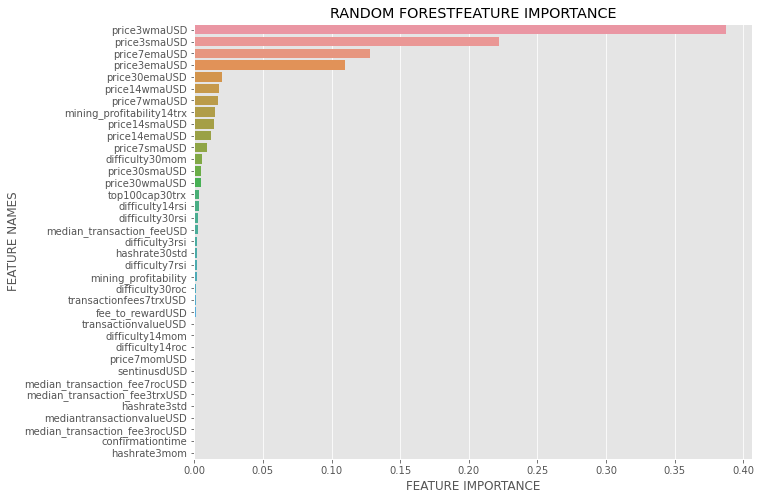

In [655]:
imp_feat=plot_feature_importance(rf_final.feature_importances_,X.columns,'RANDOM FOREST')


In [656]:
selected=imp_feat.iloc[0:22,]
selected.feature_importance.sum()

0.9897642810789292

In [657]:
X_high=X[selected.feature_names]
X_high.sort_index(axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5591: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


In [658]:
X_high['PriceShifted']=np.ravel(y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

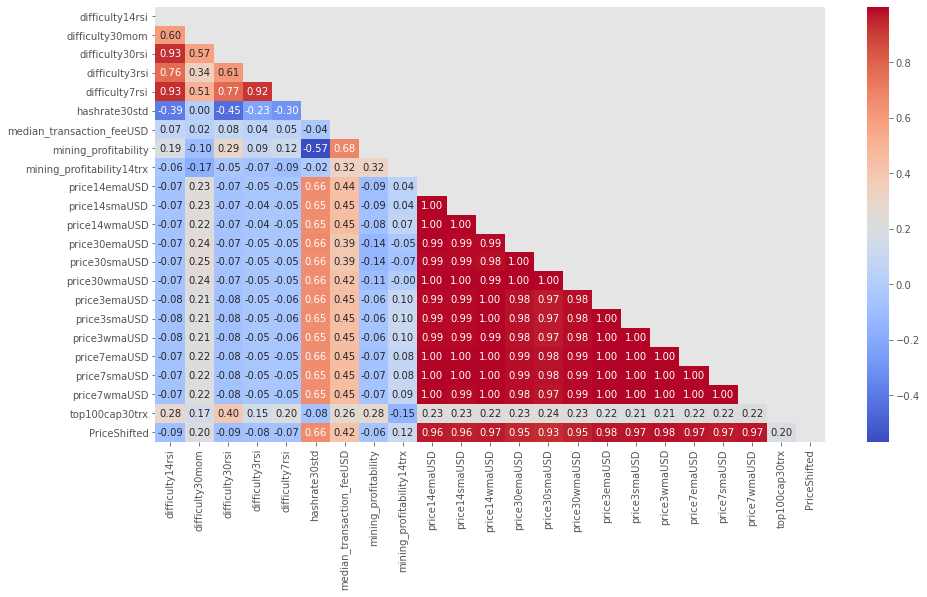

In [659]:
corr = X_high.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(corr,mask=mask, cmap='coolwarm',annot=True, fmt='.2f')

In [660]:
test=test[X_high.columns]
final_dataset=pd.concat([X_high, test])
test

,difficulty14rsi,difficulty30mom,difficulty30rsi,difficulty3rsi,difficulty7rsi,hashrate30std,median_transaction_feeUSD,mining_profitability,mining_profitability14trx,price14emaUSD,...,price30smaUSD,price30wmaUSD,price3emaUSD,price3smaUSD,price3wmaUSD,price7emaUSD,price7smaUSD,price7wmaUSD,top100cap30trx,PriceShifted
1637,43.322,-2.400535e+12,40.435,98.259,66.566,2.390008e+19,1.558,0.127,0.878,17484.0,...,16204.0,17096.0,17439.0,17240.0,17225.0,17733.0,18072.0,17798.0,-0.114,19000.0
1638,65.918,-1.838808e+12,52.107,99.983,91.743,2.314080e+19,1.195,0.128,0.788,17552.0,...,16356.0,17212.0,17716.0,17435.0,17602.0,17798.0,18010.0,17778.0,-0.114,19151.0
1639,80.671,-8.401813e+11,64.793,99.995,96.777,2.113831e+19,2.836,0.119,0.678,17732.0,...,16528.0,17376.0,18309.0,18071.0,18335.0,18074.0,18075.0,18001.0,-0.113,19207.0
1640,80.671,-8.401813e+11,64.793,99.995,96.777,2.101556e+19,4.259,0.160,0.633,17938.0,...,16711.0,17553.0,18792.0,18724.0,18938.0,18375.0,18136.0,18302.0,-0.112,18955.0
1641,80.671,-8.401813e+11,64.793,99.995,96.777,2.038267e+19,4.375,0.147,0.608,18073.0,...,16890.0,17698.0,18872.0,19043.0,19051.0,18519.0,18120.0,18505.0,-0.110,18273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,78.368,1.464506e+12,71.314,99.402,89.956,3.188720e+19,6.668,0.203,-1.628,42609.0,...,50204.0,46585.0,37531.0,36727.0,37227.0,38992.0,37973.0,37513.0,0.119,36599.0
1816,78.368,1.464506e+12,71.314,99.402,89.956,3.252403e+19,6.032,0.226,-1.699,42161.0,...,49746.0,45878.0,38391.0,38115.0,38488.0,39057.0,37987.0,37833.0,0.121,37295.0
1817,78.368,1.464506e+12,71.314,99.402,89.956,3.229762e+19,5.438,0.193,-1.769,41715.0,...,49220.0,45173.0,38601.0,38715.0,38837.0,38995.0,37843.0,38039.0,0.121,38539.0
1818,78.368,1.464506e+12,71.314,99.402,89.956,3.298070e+19,5.080,0.205,-1.824,41036.0,...,48614.0,44360.0,37613.0,38229.0,37791.0,38403.0,37484.0,37734.0,0.122,37117.0


In [661]:
final_dataset.to_csv('9010_interval1_sevenDays.csv',sep=',',index=False)

# **Loading Transformed Training Data**


In [170]:
#catch22_all(train.priceUSD)

In [818]:
PATH_TO_DATA = "8020_interval1_oneDay.csv"
final_dataset = pd.read_csv(PATH_TO_DATA)
final_dataset.shape

(1826, 23)

In [819]:
n_train_rows = int(dataset.shape[0]*.8)-1

# Split into train and test sets but keep all  columns
train_high = final_dataset.iloc[:n_train_rows, :]
test_high = final_dataset.iloc[n_train_rows:, :]

In [820]:
test_high

,hashrate3std,hashrate7mom,median_transaction_fee14rocUSD,median_transaction_fee3rocUSD,median_transaction_feeUSD,mining_profitability,price30emaUSD,price30smaUSD,price30wmaUSD,price3emaUSD,...,price7smaUSD,price7wmaUSD,sentinusdUSD,top100cap14trx,top100cap30roc,top100cap30rsi,top100cap30trx,transactions,transactionvalueUSD,PriceShifted
1455,2.632294e+18,2.100807e+19,-50.773,-15.606,0.983,0.0944,8998.0,9223.0,9275.0,9410.0,...,9167.0,9268.0,3.372632e+09,-0.045,-0.002,40.622,-0.044,285890,19509.0,9558.0
1456,1.232117e+19,2.321708e+19,-64.532,-41.170,0.847,0.0818,9034.0,9249.0,9296.0,9484.0,...,9226.0,9366.0,5.145722e+09,-0.042,-0.574,40.228,-0.044,258277,27831.0,9581.0
1457,1.503686e+19,7.426020e+18,-59.289,-25.274,1.342,0.0892,9069.0,9273.0,9318.0,9532.0,...,9334.0,9454.0,7.013213e+09,-0.038,-0.485,44.214,-0.044,308178,38943.0,9894.0
1458,1.498828e+19,1.726663e+19,-56.484,61.669,1.590,0.0848,9122.0,9304.0,9358.0,9713.0,...,9480.0,9594.0,8.305222e+09,-0.033,-0.030,47.863,-0.043,303985,50950.0,9561.0
1459,5.774339e+18,7.376017e+17,-66.330,55.529,1.318,0.0904,9151.0,9330.0,9374.0,9637.0,...,9555.0,9614.0,4.864843e+09,-0.028,-0.251,46.124,-0.043,313861,34373.0,9710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2.928675e+18,-5.265067e+18,-50.682,-41.635,2.965,0.2330,44014.0,46613.0,41970.0,36057.0,...,37096.0,36493.0,1.832795e+10,0.127,3.484,71.776,0.123,226328,179821.0,36599.0
1822,7.831326e+18,-8.760250e+18,-52.559,-12.563,3.080,0.2250,43536.0,45938.0,41324.0,36328.0,...,36884.0,36369.0,1.583247e+10,0.121,3.698,73.485,0.122,234419,232637.0,37295.0
1823,1.506715e+19,1.645901e+19,-64.258,4.013,2.954,0.2500,43133.0,45251.0,40767.0,36811.0,...,36604.0,36472.0,1.523192e+10,0.116,3.656,73.727,0.122,250423,171600.0,38539.0
1824,9.031920e+18,4.375498e+17,-70.589,-0.006,2.965,0.2330,42837.0,44692.0,40334.0,37675.0,...,36565.0,36955.0,1.630202e+10,0.111,3.229,71.514,0.122,255474,184357.0,37117.0


In [821]:
# Normalise features
#sc = MinMaxScaler(feature_range = (0, 1))
#training_set_scaled = sc.fit_transform(train_high.values)
#test_set_scaled = sc.fit_transform(test_high.values)

In [822]:
estimators=[]

In [823]:
estimators.append(['robust',RobustScaler()])

In [824]:
estimators.append(['mixmax',MinMaxScaler()])

In [825]:
scale=Pipeline(estimators,verbose=True)

In [826]:
training_set_scaled=scale.fit_transform(train_high.iloc[:,:-1])
training_set_scaled

[Pipeline] ............ (step 1 of 2) Processing robust, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing mixmax, total=   0.0s


array([[0.00208491, 0.58992973, 0.09383423, ..., 0.61377871, 0.1614181 ,
        0.00331818],
       [0.01000391, 0.59569973, 0.09329576, ..., 0.6263048 , 0.24886197,
        0.00284486],
       [0.00770583, 0.59143635, 0.09161948, ..., 0.64091858, 0.2763894 ,
        0.00312539],
       ...,
       [0.35977457, 0.7826589 , 0.03672189, ..., 0.59498956, 0.44897737,
        0.03864164],
       [0.44177575, 0.70997637, 0.03369872, ..., 0.59498956, 0.46846262,
        0.02870193],
       [0.08487284, 0.72390754, 0.0406738 , ..., 0.59498956, 0.41564896,
        0.04007889]])

In [827]:
testing_set_scaled=scale.fit_transform(test_high.iloc[:,:-1])
testing_set_scaled.shape

[Pipeline] ............ (step 1 of 2) Processing robust, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing mixmax, total=   0.0s


(371, 22)

In [828]:
target_test=test_high.iloc[:,-1:].values
target_train=train_high.iloc[:,-1:].values
target_train.shape

(1455, 1)

# **Model Architecture + Training**

### LSTM METHOD

In [829]:
# split a multivariate sequence into samples
def split_sequences(sequences,y_seq, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x = sequences[i:end_ix, :]
		seq_y = y_seq[i]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [778]:
class TimeHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [843]:
# choose a number of time steps
n_steps =30

# convert into input/output
x_train,y_train = split_sequences(training_set_scaled,target_train, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = x_train.shape[2]
x_train.shape

(1426, 30, 22)

In [844]:
time_callback = TimeHistory()

nr_epochs=50
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences = True, input_shape=(n_steps, n_features)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(loss="logcosh", optimizer="adam", metrics=['mae'])
# fit model
model.fit(x_train, y_train, epochs=nr_epochs, verbose=0,callbacks=[time_callback])

In [845]:
model.summary
model.save("shortHist_9010_multiple_features_"+str(n_steps)+"_steps_"+str(nr_epochs)+"_epochs.h5")
#times_9010_100_20
times_9010_100_3= time_callback.times

In [846]:
sum(times_9010_100_3)

51.410545110702515

In [847]:
# demonstrate prediction
x_test,y_test = split_sequences(testing_set_scaled,target_test, n_steps)
yhat = model.predict(x_test, verbose=0)
results = model.evaluate(x_test, y_test, batch_size=32)
print('test loss, test acc:', results)

11/11 [==============================] - 1s 9ms/step - loss: 20801.6094 - mae: 20802.3027
test loss, test acc: [20801.609375, 20802.302734375]


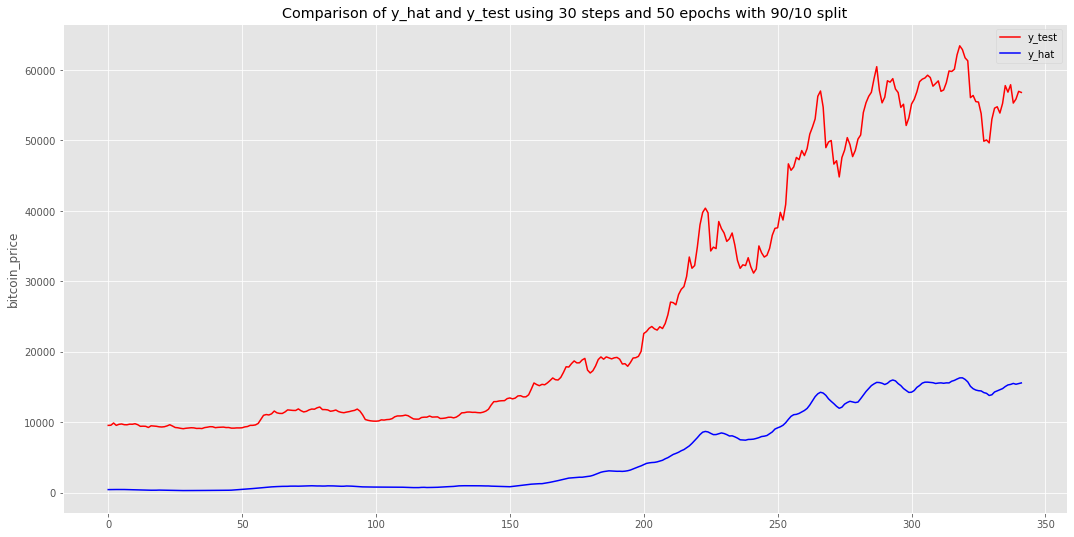

In [848]:
# Visualise the ask_price predictions
plt.figure(figsize = (18,9))
plt.plot(y_test, color = 'red', label = 'y_test')
plt.plot(yhat, color = 'blue', label = 'y_hat')
plt.title('Comparison of y_hat and y_test using '+str(n_steps)+" steps and "+str(nr_epochs)+" epochs with 90/10 split")
plt.ylabel('bitcoin_price')
plt.legend()
plt.show()

In [849]:
#model = load_model('multiple_features_50_steps_100_epochs.h5')
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=32)
print('test loss, test acc:', results)


# Evaluate on test data
11/11 [==============================] - 0s 15ms/step - loss: 20801.6094 - mae: 20802.3027
test loss, test acc: [20801.609375, 20802.302734375]


In [850]:
yhat = model.predict(x_test)

In [851]:
r2=r2_score(y_test,yhat) #testing score/ r^2
r2

-0.7394095917640751

In [852]:
mae=mean_absolute_error(y_test,yhat) #mae
mae

20802.302273220484

In [853]:
rmse=np.sqrt(mean_squared_error(y_test,yhat)) #rmse
rmse

24388.6864469552

In [854]:
mape=mean_absolute_percentage_error(y_test,yhat) #mape
mape

0.8517268600166865

In [855]:
pd.DataFrame(zip(['RMSE','MAE','MAPE'],[rmse,mae,mape])).transpose()

,0,1,2
0,RMSE,MAE,MAPE
1,24388.686447,20802.302273,0.851727


### FACEBOOK PROPHET METHOD


In [976]:
PATH_TO_DATA = "7030_interval1_oneDay.csv"
final_dataset = pd.read_csv(PATH_TO_DATA)


In [977]:
final_dataset.rename(columns = {"PriceShifted": "y"}, 
          inplace = True)
final_dataset['ds']=pd.concat([train['Date'],test['Date']])
final_dataset.dropna(subset=['y'],inplace=True)


In [978]:
n_train_rows = int(dataset.shape[0]*.7)-1

# Split into train and test sets but keep all  columns
final_train = final_dataset.iloc[:n_train_rows, :]
final_test = final_dataset.iloc[n_train_rows:, :]

In [979]:
m = Prophet()
for col in final_train.columns.difference(['ds', 'y']):
    m.add_regressor(col)
t0=time.time()
m.fit(final_train)
print ("training time:", round(time.time()-t0, 3), "s")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


training time: 1.772 s


In [980]:
forecast = m.predict(final_test.drop(columns="y"))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-04,5674.940256,7200.203357,7861.995313,5674.940256,5674.940256,1860.539427,1860.539427,1860.539427,1793.053142,...,-33.003937,-33.003937,-33.003937,100.490222,100.490222,100.490222,0.0,0.0,0.0,7535.479682
1,2019-12-05,5675.561159,7068.839694,7774.203910,5675.561159,5675.561159,1715.414388,1715.414388,1715.414388,1624.942675,...,-17.932527,-17.932527,-17.932527,108.404239,108.404239,108.404239,0.0,0.0,0.0,7390.975547
2,2019-12-06,5676.182063,7256.951291,7952.751240,5676.182063,5676.182063,1942.411002,1942.411002,1942.411002,1784.778731,...,42.089696,42.089696,42.089696,115.542576,115.542576,115.542576,0.0,0.0,0.0,7618.593065
3,2019-12-07,5676.802967,7250.450539,7929.700378,5676.802967,5676.802967,1920.106424,1920.106424,1920.106424,1803.847244,...,-5.575866,-5.575866,-5.575866,121.835046,121.835046,121.835046,0.0,0.0,0.0,7596.909390
4,2019-12-08,5677.423870,7326.282607,8016.628978,5677.423870,5677.423870,1997.186936,1997.186936,1997.186936,1828.380107,...,41.574977,41.574977,41.574977,127.231853,127.231853,127.231853,0.0,0.0,0.0,7674.610807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2021-05-31,6012.711843,35246.986065,36166.800507,5727.877030,6324.914638,29682.502763,29682.502763,29682.502763,29754.211296,...,-1.083646,-1.083646,-1.083646,-70.624887,-70.624887,-70.624887,0.0,0.0,0.0,35695.214607
545,2021-06-01,6013.332747,35540.759665,36445.067864,5727.913389,6325.919191,29985.231745,29985.231745,29985.231745,30078.717504,...,-26.068697,-26.068697,-26.068697,-67.417061,-67.417061,-67.417061,0.0,0.0,0.0,35998.564493
546,2021-06-02,6013.953651,36040.709324,37002.543332,5728.131361,6326.923744,30516.834384,30516.834384,30516.834384,30613.726939,...,-33.003937,-33.003937,-33.003937,-63.888618,-63.888618,-63.888618,0.0,0.0,0.0,36530.788035
547,2021-06-03,6014.574554,37198.716697,38145.425343,5728.683049,6327.928297,31637.321663,31637.321663,31637.321663,31715.360155,...,-17.932527,-17.932527,-17.932527,-60.105965,-60.105965,-60.105965,0.0,0.0,0.0,37651.896218


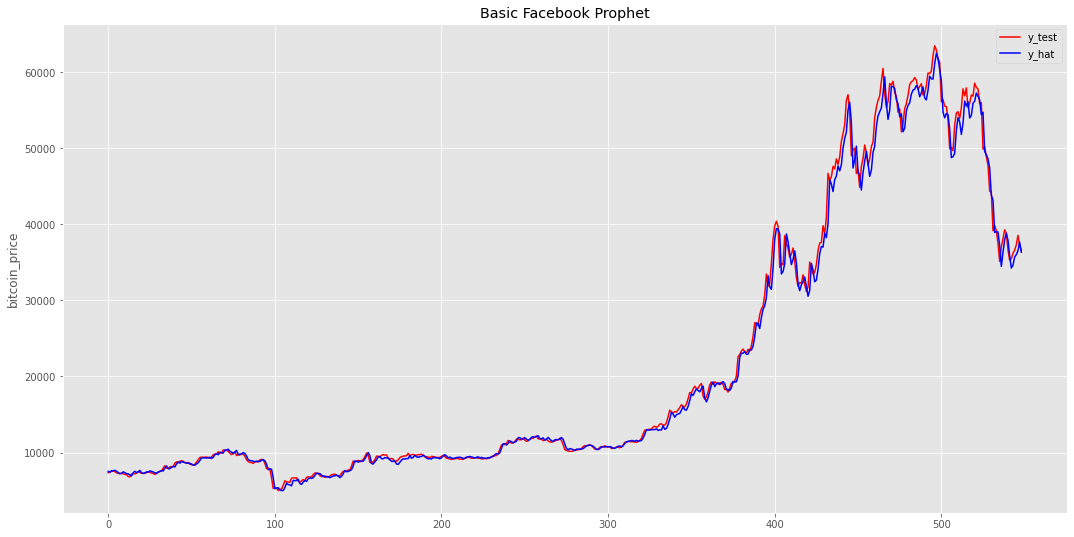

In [981]:
# Visualise the ask_price predictions
plt.figure(figsize = (18,9))
plt.plot(final_test.y.values, color = 'red', label = 'y_test')
plt.plot(forecast.yhat, color = 'blue', label = 'y_hat')
plt.title('Basic Facebook Prophet')
plt.ylabel('bitcoin_price')
plt.legend()
plt.show()

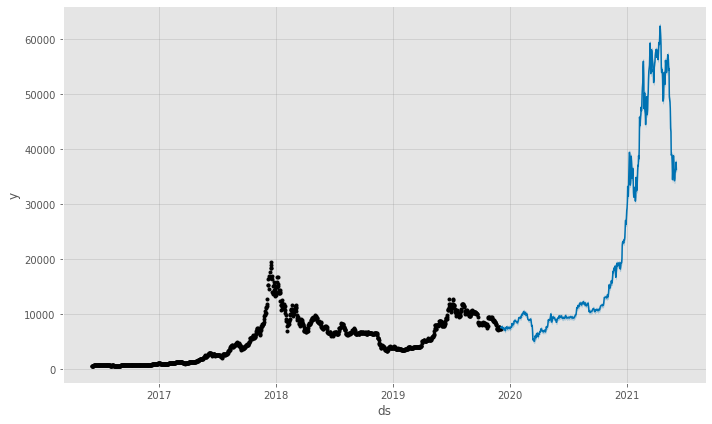

In [982]:
# Visualize
fig1 = m.plot(forecast) # Plot the fit to past data and future forcast.
#a = add_changepoints_to_plot(fig1.gca(), m, forecast)
#fig2 = m.plot_components(forecast) # Plot breakdown of components.
plt.show()

In [983]:
mae=mean_absolute_error(final_test.y.values,forecast.yhat) #mae
mae

657.2835417222566

In [984]:
rmse=np.sqrt(mean_squared_error(final_test.y.values,forecast.yhat)) #rmse
rmse

1136.455582271154

In [985]:
mape=mean_absolute_percentage_error(final_test.y.values,forecast.yhat) #mape
mape

0.027735531228149868

In [986]:
pd.DataFrame(zip(['RMSE','MAE','MAPE'],[rmse,mae,mape])).transpose()

,0,1,2
0,RMSE,MAE,MAPE
1,1136.455582,657.283542,0.027736
